In [1]:
import pandas as pd

df = pd.read_csv('Data/mag_data/all_mag_gtdb.csv')

In [2]:
df.head()

,user_genome,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,...,warnings,sample_name,sample_depth,domain,phyla,class,order,family,genus,species
0,bin_101,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,GCA_002731905.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,98.12,0.737,GCA_002731905.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,...,NaN,JV119,400,Archaea,Thermoplasmatota,Poseidoniia,MGIII,CG-Epi1,UBA8886,UBA8886 sp002731905
1,bin_103,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,JV119,400,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,JABIAG01,NaN,NaN
2,bin_107,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,JV119,400,Archaea,Nanoarchaeota,Nanoarchaeia,SCGC-AAA011-G17,JACPNG01,NaN,NaN
3,bin_112,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,NaN,NaN,NaN,NaN,NaN,GCA_016185615.1,95.0,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,...,NaN,JV119,400,Archaea,Nanoarchaeota,Nanoarchaeia,SCGC-AAA011-G17,JACPNG01,JACPNE01,NaN
4,bin_120,d__Archaea;p__Undinarchaeota;c__Undinarchaeia;...,NaN,NaN,NaN,NaN,NaN,GCA_002502135.1,95.0,d__Archaea;p__Undinarchaeota;c__Undinarchaeia;...,...,Genome not assigned to closest species as it f...,JV119,400,Archaea,Undinarchaeota,Undinarchaeia,Undinarchaeales,UBA543,UBA543,NaN


In [59]:
top_10_class = list(df.groupby('class', as_index = False)['user_genome'].count().sort_values(by = 'user_genome', ascending = False)[:10]['class'])

top_10_class                                                                   

['Gammaproteobacteria',
 'Alphaproteobacteria',
 'Dehalococcoidia',
 'ABY1',
 'Paceibacteria',
 'Acidimicrobiia',
 'Nitrososphaeria',
 'Nanoarchaeia',
 'Phycisphaerae',
 'Vicinamibacteria']

In [60]:
plot_class = []

for item in df['class']:
    if item in top_10_class:
        plot_class.append(item)
    else:
        plot_class.append('Other')

df['plot_class'] = plot_class

In [61]:
# list comprehension solution
df['plot_class'] = [item if item in top_10_class else 'Other' for item in df['plot_class']]

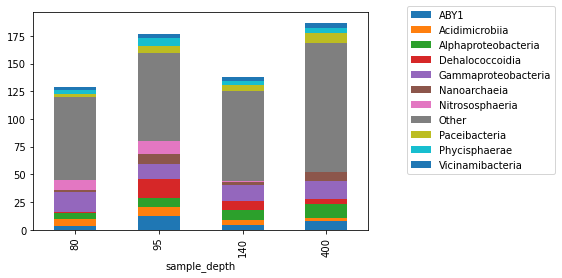

In [62]:
import matplotlib.pyplot as plt

class_counts = df.groupby(['sample_depth', 'plot_class'], as_index = False)['user_genome'].count().pivot(columns = 'plot_class', index = 'sample_depth', values = 'user_genome')


class_counts.plot.bar(stacked = True)

plt.legend(bbox_to_anchor=(1.1, 1.05))


In [63]:
class_counts

plot_class,ABY1,Acidimicrobiia,Alphaproteobacteria,Dehalococcoidia,Gammaproteobacteria,Nanoarchaeia,Nitrososphaeria,Other,Paceibacteria,Phycisphaerae,Vicinamibacteria
sample_depth,,,,,,,,,,,
80,3.0,7.0,5.0,1.0,18.0,2.0,9.0,75.0,3.0,3.0,3.0
95,12.0,9.0,8.0,17.0,13.0,9.0,12.0,80.0,6.0,7.0,4.0
140,4.0,5.0,9.0,8.0,14.0,3.0,1.0,81.0,6.0,3.0,4.0
400,8.0,3.0,12.0,5.0,16.0,8.0,NaN,117.0,9.0,4.0,5.0


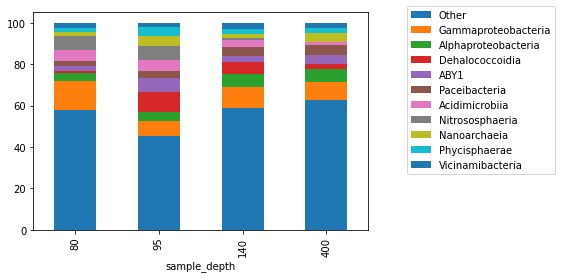

In [64]:


column_order = ['Other'] + top_10_class

class_pcts = class_counts.div(class_counts.sum(axis=1), axis=0)
class_pcts = round(class_pcts * 100, 1)



class_pcts[column_order].plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [65]:
class_pcts

plot_class,ABY1,Acidimicrobiia,Alphaproteobacteria,Dehalococcoidia,Gammaproteobacteria,Nanoarchaeia,Nitrososphaeria,Other,Paceibacteria,Phycisphaerae,Vicinamibacteria
sample_depth,,,,,,,,,,,
80,2.3,5.4,3.9,0.8,14.0,1.6,7.0,58.1,2.3,2.3,2.3
95,6.8,5.1,4.5,9.6,7.3,5.1,6.8,45.2,3.4,4.0,2.3
140,2.9,3.6,6.5,5.8,10.1,2.2,0.7,58.7,4.3,2.2,2.9
400,4.3,1.6,6.4,2.7,8.6,4.3,NaN,62.6,4.8,2.1,2.7
